In [108]:
import numpy as np
import matplotlib.pyplot as plt

## **Punto 1**

Se tienen tres líneas en $\mathbb{R}^2$:
$$2x-y=2$$
$$x+2y=1$$
$$x+y=4$$
a) Con el metodo de minimos cuadrados encuentre el punto comun a las tres líneas. Grafique las tres lineas y el punto encontrado anteriormente, ¿Que interpretación puede dar?


b) Realice una busqueda iterativa entre $-5< x< 5 \, $ \, y $-5< y< 5 $ con un paso de $h=0.03$ para encontrar la menor distancia. Grafique la distancia y compare con el resultado obtenido anteriormente.

In [109]:
#punto a
A=np.array([[2, -1] ,[1, 1] ,[ 3 ,1]])
b=np.array([[2], [ 1] , [2]])
A,b

(array([[ 2, -1],
        [ 1,  1],
        [ 3,  1]]), array([[2],
        [1],
        [2]]))

In [110]:
AT = np.dot(A.T,A)
bT = A.T @ b
x= np.linalg.solve(AT,bT)
x

array([[ 0.81578947],
       [-0.21052632]])

In [111]:
func1= lambda x: 2*x-2
func2= lambda x,: (1-x)/2
func3= lambda x: 4-x

In [112]:
X=np.linspace(-5,10,1000)

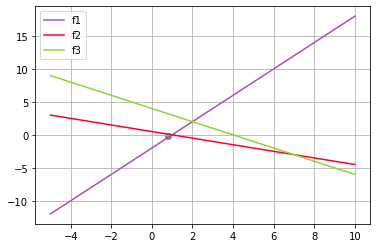

In [113]:
fig, ax= plt.subplots()
ax.plot(X,[func1(i) for i in X],c='#AA50AF',label='f1')
ax.plot(X,[func2(i) for i in X],c='#FF0024',label='f2')
ax.plot(X,[func3(i) for i in X],c='#87D837',label='f3')
ax.scatter(x[0],x[1],c="#559F91")
ax.grid()
ax.legend(fontsize=10)

se puede ver que este punto fue el registrado ya que es en donde la distancia entre rectas es la menor. Teniendo en cuenta que f2 y f1 se cruzan en este punto, ademas que este está a una distancia muy cercana a f3, a diferencia de la otra intersección existente, este es el punto mas cercano a considerarse una intersección de las 3

In [114]:
#punto b
intervalo = np.linspace(-4.5,4.5,333)
def distancia(x,y):
  d=A.dot(np.array([[x],[y]]))-b
  d_n= np.linalg.norm(d)
  return d_n


In [115]:
xi= intervalo
yi= intervalo
X,Y= np.meshgrid(xi, yi)
print(X.shape)
z=np.zeros(X.shape)
for i in range( len(yi)):
  for j in range(len(xi)):
    z[i][j]=distancia(X[i][j],Y[i][j])
z

(333, 333)


array([[23.28626204, 23.18965908, 23.09309751, ..., 13.32773431,
        13.41376021, 13.5       ],
       [23.25893609, 23.16228261, 23.06567016, ..., 13.31640473,
        13.402613  , 13.48903302],
       [23.2316729 , 23.13496904, 23.03830584, ..., 13.30523119,
        13.39162114, 13.47822069],
       ...,
       [19.02312541, 18.93038862, 18.83774143, ..., 17.81476763,
        17.90632378, 17.99798581],
       [19.02793855, 18.93530295, 18.84275793, ..., 17.84710384,
        17.93857688, 18.03015646],
       [19.03286631, 18.94033241, 18.84789006, ..., 17.87950488,
        17.97089478, 18.06239187]])

In [116]:
def distancia(x,y,p):
  d=(((y-p[1])**2)+((x-p[0])**2))*0.5
  return d


xi=intervalo
yi=intervalo
X, Y = np.meshgrid(xi, yi)
temp=distancia(X,Y,x)
temp

array([[23.32860111, 23.18486581, 23.04186539, ..., 15.78821923,
        15.8869901 , 15.98649584],
       [23.21268763, 23.06895234, 22.92595191, ..., 15.67230575,
        15.77107662, 15.87058237],
       [23.09750902, 22.95377372, 22.8107733 , ..., 15.55712713,
        15.65589801, 15.75540375],
       ...,
       [24.9694177 , 24.82568241, 24.68268198, ..., 17.42903582,
        17.5278067 , 17.62731244],
       [25.09601039, 24.9522751 , 24.80927467, ..., 17.55562851,
        17.65439939, 17.75390513],
       [25.22333795, 25.07960266, 24.93660223, ..., 17.68295607,
        17.78172694, 17.88123269]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


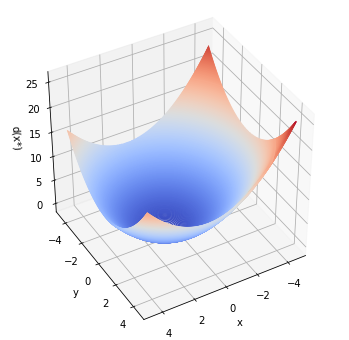

In [117]:

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.contour3D(xi, yi, temp, 500, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='red')
ax.view_init(40, 60)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('d(x*)')
ax.scatter([0.81578947],[-0.21052632],c="r")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  after removing the cwd from sys.path.


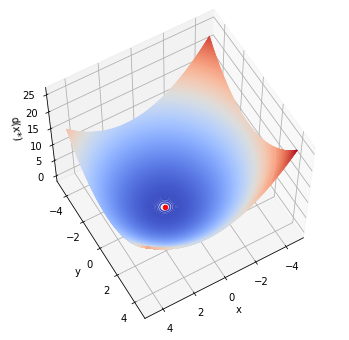

In [118]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.contour3D(xi, yi, temp, 800, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='red')
ax.view_init(60, 60)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('d(x*)')
ax.scatter([0.81578947],[-0.21052632],c="r")

In [119]:
print(distancia(0.821,-0.2105,x))
np.amin(distancia(X,Y,x))
# como se puede ver, el punto minimo es encontrado en el mismo punto x encontrado por minimos cuadrados como se ve arriba en la grafica. o mas bien es un valor muy cercano a este.

[1.35751385e-05]


2.3321936412337634e-05

## **Punto 8**

Calcule la proyección ortogonal del vector $b = (−3, −3, 8, 9)$ sobre el sub-espacio W generado por los vectores:
$$u1 = (3, 1, 0, 1)$$
$$u2 = (1, 2, 1, 1)$$
$$u3 = (−1, 0, 2, −1)$$ 


a) Usando mínimos cuadrados matriciales. La proyección ortogonal es $pW (b) = Ax$, donde las columnas de A son los vectores base y x es la solución de mínimos cuadrados.


b) Con el proceso de Grand-Schmidt obtener una base ortonormal (v1, v2, v3) y luego calcular la proyección sobre dicha base: $pW (b) = c_1v_1 +c_2v_2 +c_3v_3$, donde $c_i =< b.v_i >$
para $i = 1, 2, 3$. Respuesta: $pW (b) = (−2, 3, 4, 0)$

Recuerde que el procedimiento de Grand-Schmidt es:

$$u_{k}=v_k-\sum_{j=1}^{k-1}\frac{< v_k,u_j >}{<u_j,u_j >}u_j$$


In [120]:
#valores iniciales
u1 = np.array([3,1,0,1])
u2 = np.array([1,2,1,1])
u3 = np.array([-1,0,2,-1])
b = np.array([-3,-3,8,9])

In [121]:
#punto a
An=np.array([[3,1,0,1],[1,2,1,1],[-1,0,2,-1]])
AdT=An.T

In [122]:
v_x = np.linalg.pinv(AdT) @ b
pw_b=AdT @ v_x

In [123]:
pw_b.round(0)

array([-2.,  3.,  4.,  0.])

In [124]:
#punto b

v1=-u1/np.sqrt(u1.dot(u1))
u2=u2-u1*(u1.dot(u2)/u1.dot(u1))
v2=-u2/np.sqrt(u2.dot(u2))
u3=u3-(u1*(u1.dot(u3)/u1.dot(u1)))-u2*(u2.dot(u3)/u2.dot(u2))
v3=-u3/np.sqrt(u3.dot(u3))

prod=np.array([v1,v2,v3])

res = prod.T @ prod @ b
res.round(0)

array([-2.,  3.,  4.,  0.])